#### Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
## Train test split
from sklearn.model_selection import train_test_split

In [9]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [14]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [24]:
# Performance Metrics MSE,MAE,RMSE,R square and adjusted R square
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
# Read the data 
df = pd.read_csv('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/Project/Simple_Linear_Project/Data/height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


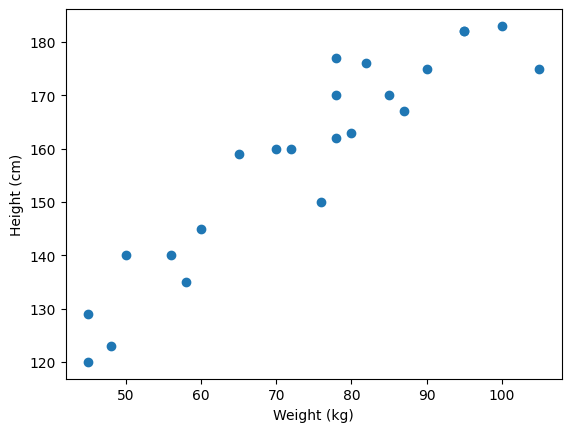

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.show()

In [4]:
# divide our dataset into independent and dependent features
X = df[['Weight']] # independent feature
y = df['Height'] # dependent feature

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [7]:
X.shape

(23, 1)

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [10]:
scaler=StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

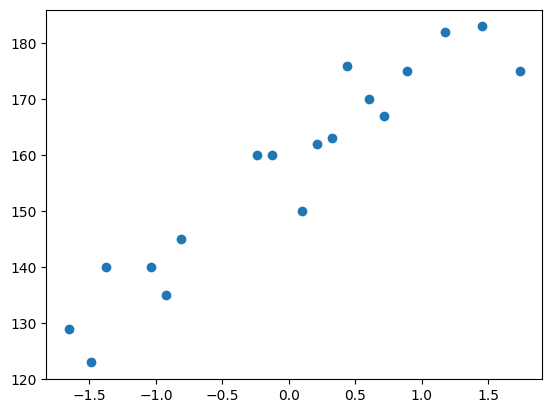

In [13]:
plt.scatter(X_train,y_train)

In [15]:
regressor=LinearRegression()

In [16]:
regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


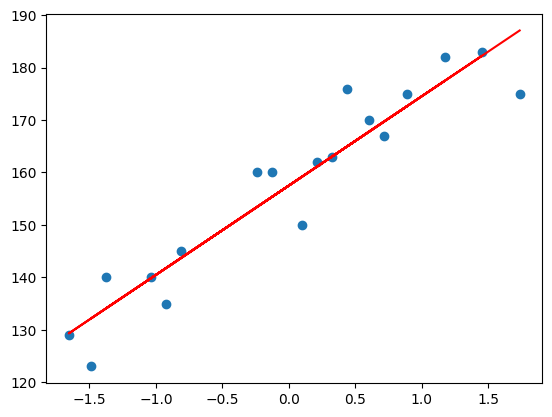

In [18]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [19]:
y_pred_test=regressor.predict(X_test)

In [20]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

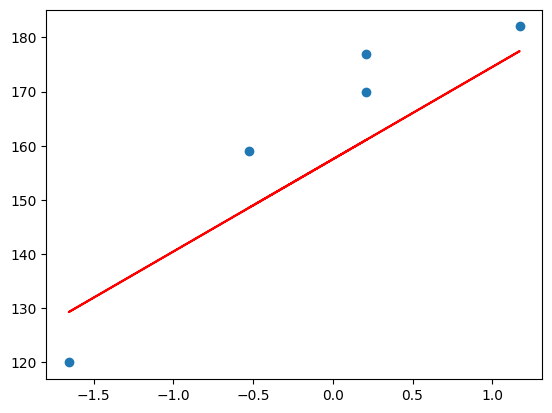

In [21]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

In [23]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [26]:
score=r2_score(y_test,y_pred_test)
score

0.776986986042344

In [27]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [28]:
## new data point weight is 80

scaled_weight=scaler.transform([[80]])
scaled_weight

/opt/anaconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [29]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


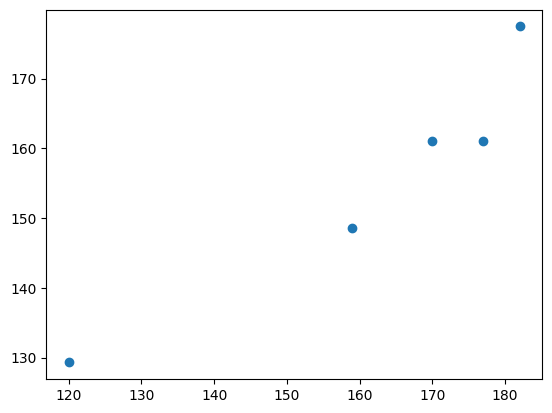

In [30]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [31]:
## Residuals
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

/var/folders/m1/m54k9pbj7hbcvckx27dplr840000gn/T/ipykernel_3707/2747191050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

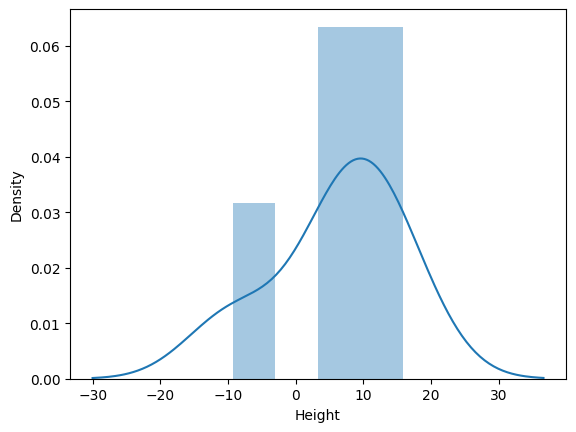

In [34]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

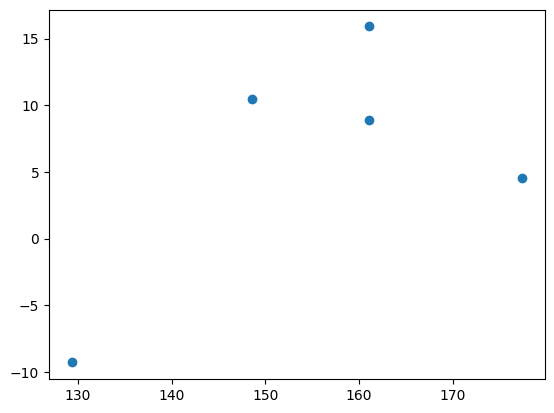

In [35]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)